## GENERADOR DE IMG CON IA

Para hacer esta práctica he tenido como referencia la guia sobre generar imagenes usando la APi de Replicate. A continuación detallo los pasos seguidos en el proceso.

In [ ]:
!pip install replicate requests pillow matplotlib --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.9 MB/s eta 0:00:00


Importamos las librerías necesarias para nuestro proyecto

In [ ]:
import os
import replicate
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

Necesitaremos la API KEY de nuestro usuario regisrtado en la web y lo guardamos en una variable

Por seguridad he eliminado mi token a la hora de guardar este notebook

In [ ]:
REPLICATE_API_TOKEN = input("Replicate API Token: ")
client = os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

Replicate API Token: 


Buscaremos un buen modelo de generación de imagenes y lo entrenaremos con fotos mias. Crearemos en nuestro perfil de Replicate un modelo para nuestro uso.

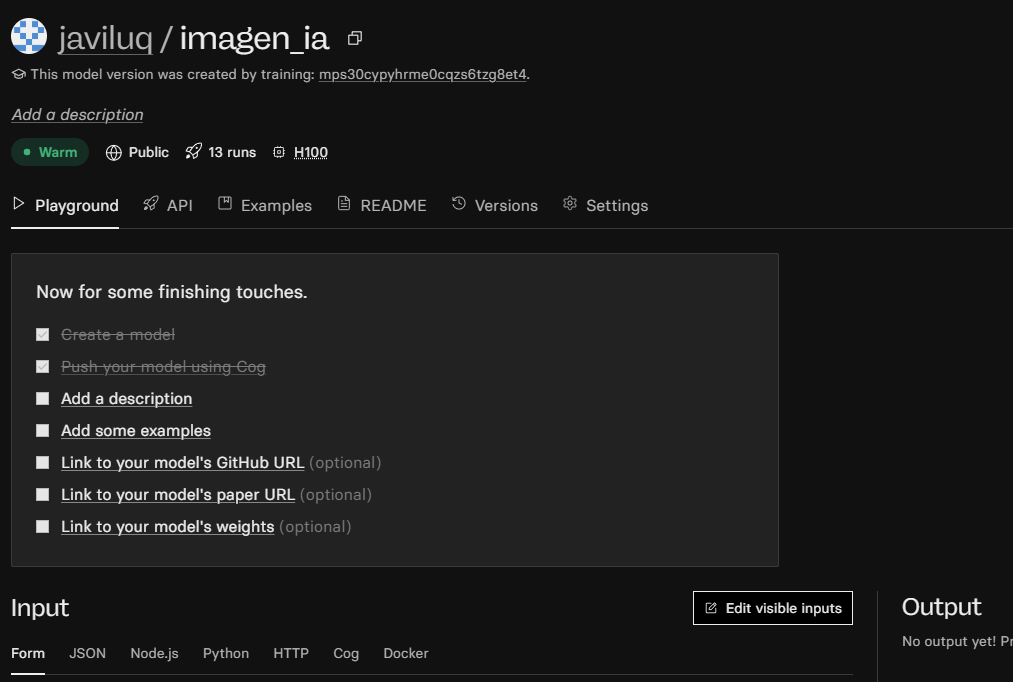

In [ ]:
MODEL_NAME = "javiluq/imagen_ia"
VERSION_ID = "07a38ebfaff6051a1c99b89369768856b4e636785b853a5dd3a70f58a5d0151c"

Tenemos el modelo listo, ahora vamos a usar ChatGPT para que nos cree unos prompts que generen buenas imagenes. En mi caso le he dado algunos ejemplos de lo que quiero y le he pedido que genere prompts como si fuese un modelo que genera imagenes IA, que tengan muchos detalles, sean impactantes y que me lo escriba en inglés. Aquí los resultados:

In [ ]:
prompts = [
   "A cyberpunk-style portrait of a TOK standing in a rain-soaked alley in a futuristic neon-lit city at night, wearing a dark techwear outfit with glowing accents, cybernetic arm, LED visor partially covering his face, mohawk haircut wet from the rain, neon signs reflecting on puddles, background full of holograms and flying cars, electric blue and hot pink tones dominating the scene, cinematic lighting, smoke rising from vents, dramatic composition, ultra-detailed, Blade Runner aesthetic",
   "A powerful live performance scene of a TOK rock guitarist on stage under bright concert lights, intense facial expression, electric guitar slung low, wearing dark ripped jeans, leather jacket, smoke and lasers around him, crowd cheering in the background, dramatic lighting from above, moody atmosphere, sparks flying from the strings, high-energy rock vibe, ultra-realistic style",
   "A dramatic scene of a male rock climber mid-ascent on a towering granite cliff at sunrise, intense expression, muscular arms gripping jagged rocks, wearing rugged outdoor gear with a chalk bag and harness, golden morning light casting sharp shadows, misty mountains in the background, cinematic composition, ultra-detailed, hyper-realistic style, 85mm lens look, shallow depth of field"
]

Tambien le he preguntado por parametros adecuados para generar estas imágenes.

In [ ]:
image_params = {
    "num_inference_steps": 50,
    "go_fast": False,
    "lora_scale": 0.9,
    "megapixels": "1",
    "num_outputs": 1,
    "aspect_ratio": "1:1",
    "output_format": "webp",
    "guidance_scale": 7.5,
    "output_quality": 90,
    "prompt_strength": 0.9,
    "extra_lora_scale": 0.8,
}

In [ ]:
image_urls = []


Ponemos a prueba la conexión con el modelo con la API y generamos una img por cada prompt.

In [ ]:
for idx, prompt in enumerate(prompts):
    print(f"🖼 Generando imagen {idx + 1}/{len(prompts)}...")
    try:
        output = replicate.run(
            f"{MODEL_NAME}:{VERSION_ID}",
            input={"prompt": prompt, **image_params}
        )
        if output:
            image_urls.append(output[0])
            print(f"✅ Imagen {idx + 1} generada: {output[0]}")
        else:
            print(f"⚠ No se generó ninguna imagen para el prompt {idx + 1}.")
    except Exception as e:
        print(f"❌ Error al generar la imagen {idx + 1}: {e}")

🖼 Generando imagen 1/3...
✅ Imagen 1 generada: https://replicate.delivery/xezq/8jSUZlngauLCORFcwccJYdq6ggqQBwT2OsizfP5uLboHoAgKA/out-0.webp
🖼 Generando imagen 2/3...
✅ Imagen 2 generada: https://replicate.delivery/xezq/6Ry4uKzyIyZBOZoDRWFZLeraA4hmQdvPJChF2h73i3zOoAgKA/out-0.webp
🖼 Generando imagen 3/3...
✅ Imagen 3 generada: https://replicate.delivery/xezq/qUyc23aSPMZhMhlEeMYUgSFQhdXCdf4xn9Zy6eikznEUhCAqA/out-0.webp


Tengo la url de las imágenes creadas y quedan en formato .webp, por lo que vamos a descargarlas y mostramos el resultado.

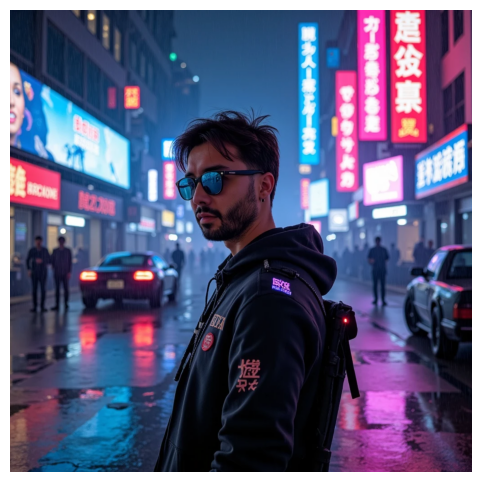

✅ Imagen guardada como 'imagen_generada_1.png'


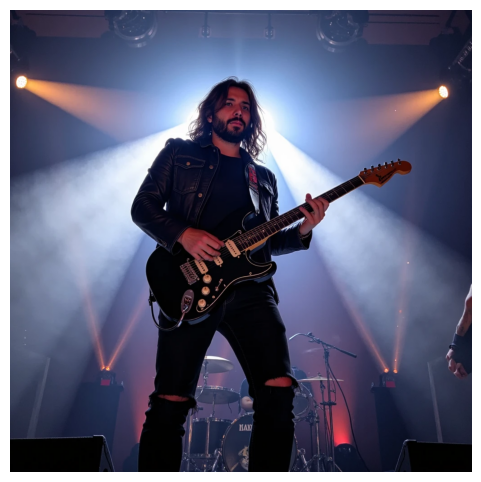

✅ Imagen guardada como 'imagen_generada_2.png'


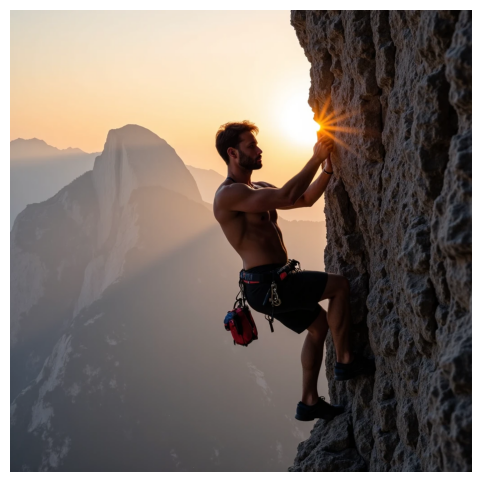

✅ Imagen guardada como 'imagen_generada_3.png'


In [ ]:
if image_urls:
    for idx, img_url in enumerate(image_urls):
        response = requests.get(img_url)
        if response.status_code == 200:
            image = Image.open(BytesIO(response.content))

            # Mostrar imagen en el notebook
            plt.figure(figsize=(6, 6))
            plt.imshow(image)
            plt.axis("off")
            plt.show()

            # Guardar imagen con un nombre único
            image_filename = f"imagen_generada_{idx + 1}.png"
            image.save(image_filename)
            print(f"✅ Imagen guardada como '{image_filename}'")
        else:
            print(f"❌ No se pudo descargar la imagen {idx + 1}.")
else:
    print("⚠ No se generaron imágenes.")